# Home Property Analysis

**Author:** Elimelech Berlin  
**Date:** March 2023
***

### Overview
This report analyzes available data to identify home features that have a strong correlation with home sale prices. Included in this data is information about home features such as living space, utilities ...
***

### Business Problem
Investors looking to turn a profit from flipping houses are presented with the following dilemma: With a finite amount of funds to invest per property, how should they spend their money to maximize their return? What home features are associated with an increase in home value?  
In this report I explore a given dataset to pinpoint what sort of renovations/improvements investors would be advised to spend their money on in an effort to maximize a given home's resail value.
***

### Data
The data examined in this report describes properties located in King County, Washington and comes from the King County Assessor Data Download available from the [King County Department of Assesments webpage](https://info.kingcounty.gov/assessor/DataDownload/default.aspx). (Some of the properties are located outside of the county proper).  
This dataset contains information about a variety of home/property features of about 30,000 properties. Features described include general details (location, view from the home etc.) as well as details about the actual structure and layout (square-footage, utilities etc.) of the properties.  
In creating this report the following two files were used:
* [kc house data.csv](https://github.com/terminalcoder/dsc-phase-2-project-v2-5/blob/main/data/kc_house_data.csv) contains the dataset 
* [column names.md](https://github.com/terminalcoder/dsc-phase-2-project-v2-5/blob/main/data/column_names.md) contains descriptive information about each column in the dataset
***

In [162]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

To get started, have a look at the data:

In [163]:
# load dataset from file & preview it
kc_house_data = pd.read_csv('data/kc_house_data.csv')
kc_house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


### Data Preparation
First, we will neaten the data to prepare it for analysis:

In [164]:
# create list of columns to ignore (drop) in this report
col_to_ignore = ['date', 'view', 'sqft_above', 'address', 'lat', 'long']

# drop those columns
kc_house_data.drop(col_to_ignore, axis=1, inplace=True)

In [165]:
# get a sense of the distributios of the features
kc_house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,476.039396,330.211142,217.412038,1975.163953,90.922301
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,579.631302,285.770536,245.302792,32.067362,416.473038
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,0.000000,0.000000,0.000000,1900.000000,0.000000
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,0.000000,0.000000,40.000000,1953.000000,0.000000
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,0.000000,400.000000,150.000000,1977.000000,0.000000
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,940.000000,510.000000,320.000000,2003.000000,0.000000
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000


In [166]:
# check for null values
kc_house_data.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
dtype: int64

In [167]:
# drop rows with null values for ease of use
kc_house_data.dropna(inplace=True)

In [168]:
# identify datatypes per column
kc_house_data.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
greenbelt         object
nuisance          object
view              object
condition         object
grade             object
heat_source       object
sewer_system      object
sqft_basement      int64
sqft_garage        int64
sqft_patio         int64
yr_built           int64
yr_renovated       int64
dtype: object

### Data Analysis

As this report aims to identify ways in which properties can be renovated or improved to maximize resale value, I will examine the data using the home features other than price as predictor variables and the target variable will be price.

First, get a sense of how each numerical variable is independently correlated with the target variable:

In [169]:
# check correlation of numerical features with price, in descending order
kc_house_data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.608616
bathrooms        0.480337
sqft_patio       0.313789
bedrooms         0.288954
sqft_garage      0.263674
sqft_basement    0.245005
floors           0.180589
yr_built         0.095796
sqft_lot         0.086550
yr_renovated     0.085023
id              -0.034096
Name: price, dtype: float64

Too help avoid multicollinearity, let's view a heatmap to see the correlation between features:

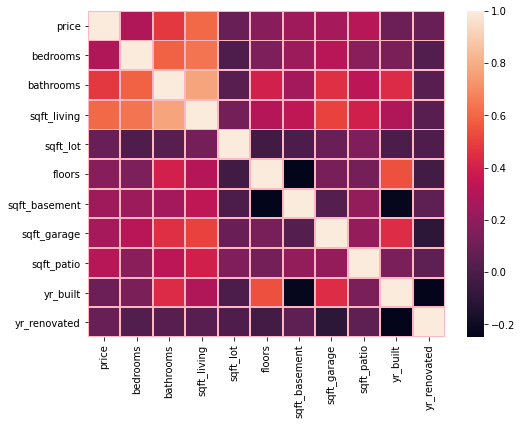

In [170]:
# create figure & axes, set figure size to be large enough to be useful
fig, ax =plt.subplots(figsize=(8, 6))
# plot heatmap of numerical values
sns.heatmap(kc_house_data.drop('id', axis=1).select_dtypes(exclude = 'object').corr(), linewidths= .9, linecolor='lightpink');

Two important observations emerge from the above image:
* The sqft_living feature is the most correlated with the target feature of price.
* Sqft_living & bathrooms features are highly correlated with each other & should not both be included in a regression model to avoid issues of multicollinearity. (We can use one of them, just not both.)

#### Regression Modeling
Let's begin our investigation with the sqft_living feature.  
To get a sense of things, create a visualization of square-footage vs. price:

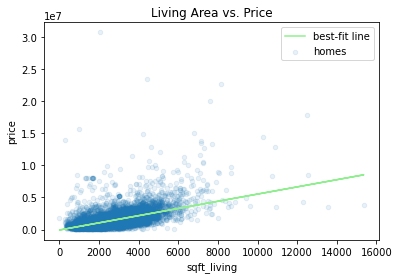

In [171]:
# plot sqft_living vs. price
kc_house_data.plot.scatter(x='sqft_living', y='price', alpha=.1, label='homes')
plt.title('Living Area vs. Price')

# add best-fit line to the plot
a, b = np.polyfit(kc_house_data['sqft_living'], kc_house_data['price'], 1)
plt.plot(kc_house_data['sqft_living'], a*kc_house_data['sqft_living']+b, color= 'lightgreen', label='best-fit line')
plt.legend();

Unsurprisingly, there is a visible correlation between the predictor of square-feet of living space & home sale price as indicated by the upward slope of the mass of data points.

Now, to truly understand the relationship between these two features let's build a linear regression model:

In [172]:
# set variables for the model
X_baseline = kc_house_data[['sqft_living']]
y = kc_house_data['price']

# create model
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

In [173]:
# view summary of the results
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:34:12   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      0.000   -9.48e+04   -5.64e+04
sqft_living   560.5134      4.211    133.096      0.000     552.259     568.768
==============================================================================
Omnibus:                    43384.874   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47187801.072
Skew:                           8.195   Prob(JB):                         0.00
Kurtosis:                     196.242   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model Evaluation
The overall model is statistically significant with a p-value of (nearly) 0.
The R-squared value indicates that 37% of the variance in the data is explained by the sqft_living feature.  

### Multiple Linear Regression Modeling
Let's add  several more predictor variables to try and maximize the adjusted R-squared value (i.e. better understand what features influence home price). Let's take a look at the grade feature of the homes in the dataset. (This feature describes the types of materials & quality of workmanship of homes). We begin by plotting a bar graph of the average price of homes in each grade level to get a sense of the effect of grade on price.

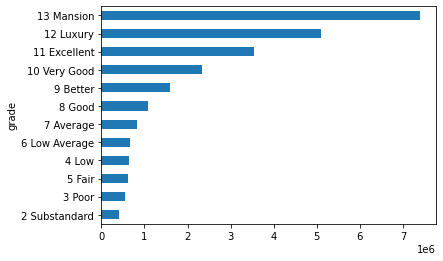

In [174]:
# plot average home price by grade
kc_house_data.groupby('grade').mean()['price'].sort_values(ascending = True).plot(kind='barh');

From the above plot it's apparent that there is a clear difference in average price between homes of different grades.  
Now, let's add this feature to the linear regression model. To do so, this column's categorical values must first be transformed into numerical values via one-hot encoding. The lowest grade, grade_2 Substandard, will be the reference category.

In [175]:
pd.get_dummies(kc_house_data, columns = ['condition'])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,7399300360,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,0,0,40,1969,0,0,0,1,0,0
1,8910500230,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,1570,0,240,1950,0,1,0,0,0,0
2,1180000275,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,1580,0,0,1956,0,1,0,0,0,0
3,1604601802,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,1070,200,270,2010,0,1,0,0,0,0
4,8562780790,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,550,550,30,2012,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,1130,0,210,1921,0,0,0,1,0,0
30151,194000695,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,0,0,520,2011,0,1,0,0,0,0
30152,7960100080,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,...,920,240,110,1995,0,1,0,0,0,0
30153,2781280080,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,...,740,480,100,2006,0,1,0,0,0,0


In [176]:
# add new columns for one-hot encoding of the grade feature & drop lowest to be the reference category
kc_house_data = pd.get_dummies(kc_house_data, columns=['grade', 'condition']).drop(['grade_2 Substandard', 'condition_Poor'], axis=1)

In [177]:
# build new model and display its summary

# set predictor variables
X_2 = kc_house_data[['sqft_living', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair', 
                     'grade_6 Low Average','grade_7 Average', 'grade_8 Good', 'grade_9 Better', 'grade_10 Very Good', 
                     'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion']]

# create regression model
model_2 = sm.OLS(y, sm.add_constant(X_2))
results_2 = model_2.fit()
# display results summary
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     2148.
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:34:14   Log-Likelihood:            -4.4612e+05
No. Observations:               30111   AIC:                         8.923e+05
Df Residuals:                   30098   BIC:                         8.924e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.632e+05   6.58e+05      0.248      0.804   -1.13e+06    1.45e+06
sqft_living           311.6109      5.783     53.884      0.000     300.276     322.946
grade_3 Poor         1.466e+05   6.94e+05      0.211      0.833   -1.21e+06    1.51e+06
grade_4 Low           2.75e+05   6.65e+05      0.413      0.679   -1.03e+06    1.58e+06
grade_5 Fair         1.721e+05   6.59e+05      0.261      0.794   -1.12e+06    1.46e+06
grade_6 Low Average  1.129e+05   6.58e+05      0.172      0.864   -1.18e+06     1.4e+06
grade_7 Average      1.185e+05   6.58e+05      0.180      0.857   -1.17e+06    1.41e+06
grade_8 Good         2.312e+05   6.58e+05      0.351      0.725   -1.06e+06    1.52e+06
grade_9 Better       5.294e+05   6.58e+05      0.804      0.421   -7.61e+05    1.82e+06
grade_10 Very Good   1.017e+06   6.59e+05      1.545      0.122   -2.73e+05    2.31e+06
grade_11 Excellent    1.94e+06   6.59e+05      2.943      0.003    6.48e+05    3.23e+06
grade_12 Luxury      3.127e+06   6.61e+05      4.727      0.000    1.83e+06    4.42e+06
grade_13 Mansion     4.699e+06   6.73e+05      6.982      0.000    3.38e+06    6.02e+06
==============================================================================
Omnibus:                    43091.497   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         50217461.105
Skew:                           8.049   Prob(JB):                         0.00
Kurtosis:                     202.416   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Evaluation
The overall model is statistically significant with a p-value of (nearly) 0.
The adjusted R-squared value indicates that 46% of the variance in the price target is explained by the sqft_living and grade features. This is an increse of 9% over the previous model, this model better explains the data than the previous one.

It's notable that according to the above model results, the amount each feature is higher than the reference category does not increase in the percise order of the grades. The order in which the values increase is 3, 6, 7, 5, 4, 8, 9, 10, 11, 12, 13. Reasons for this may include that the above model doesn't account for certain other factors (e.g. waterfront, nuisance, year_built) that can effect home prices regardless of grade. 

#### Model Improvement
Let's continue to add features to the model and improve it.  
Let's take a look at the grade feature of the homes in the dataset. Begin by plotting a bar graph of the average price of homes in each grade level to get a sense of the effect of grade on price.

In [208]:
kc_house_data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'heat_source',
       'sewer_system', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'grade_10 Very Good', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low',
       'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'condition_Average', 'condition_Fair',
       'condition_Good', 'condition_Very Good', 'patio', 'big_patio'],
      dtype='object')

<AxesSubplot:xlabel='sqft_patio'>

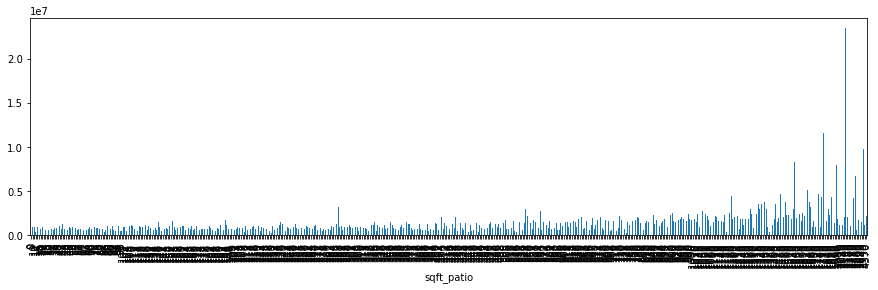

In [184]:
fig, ax = plt.subplots(figsize=(15, 4))
kc_house_data.groupby('sqft_patio').mean()['price'].plot(kind='bar')

In [234]:
kc_house_data['greenbelt'].value_counts()

NO     29339
YES      772
Name: greenbelt, dtype: int64

In [235]:
kc_house_data['greenbelt_yes'] = np.where(kc_house_data['nuisance'] == 'YES', 1, 0)

In [226]:
kc_house_data = pd.get_dummies(kc_house_data, columns= ['sewer_system']).drop('sewer_system_PRIVATE RESTRICTED', axis=1)

In [229]:
kc_house_data = pd.get_dummies(kc_house_data, columns= ['heat_source']).drop('heat_source_Electricity', axis=1)

In [230]:
kc_house_data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'grade_10 Very Good', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low',
       'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'condition_Average', 'condition_Fair',
       'condition_Good', 'condition_Very Good', 'patio', 'big_patio',
       'nuisance_yes', 'sewer_system_PRIVATE', 'sewer_system_PUBLIC',
       'sewer_system_PUBLIC RESTRICTED', 'heat_source_Electricity/Solar',
       'heat_source_Gas', 'heat_source_Gas/Solar', 'heat_source_Oil',
       'heat_source_Oil/Solar', 'heat_source_Other'],
      dtype='object')

In [246]:
# build new model and display its summary

# set predictor variables
X_3 = kc_house_data[['sqft_living', 'sqft_garage', 'sqft_patio', 'sqft_basement', 'floors', 'yr_renovated', 'bedrooms',
                     'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average','grade_7 Average', 'grade_8 Good',
                     'grade_9 Better', 'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion',
                     'condition_Average', 'condition_Fair', 'condition_Good', 'condition_Very Good',
                     'sewer_system_PRIVATE', 'sewer_system_PUBLIC', 'sewer_system_PUBLIC RESTRICTED',
                     'heat_source_Electricity/Solar','heat_source_Gas', 'heat_source_Gas/Solar', 'heat_source_Oil',
       'heat_source_Oil/Solar', 'heat_source_Other']]

# create regression model
model_3 = sm.OLS(y, sm.add_constant(X_3))
results_3 = model_3.fit()
# display results summary
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     925.9
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:30:51   Log-Likelihood:            -4.4535e+05
No. Observations:               30111   AIC:                         8.908e+05
Df Residuals:                   30079   BIC:                         8.910e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           2.396e+05   7.06e+05      0.339      0.734   -1.14e+06    1.62e+06
sqft_living                      345.7677      7.963     43.422      0.000     330.160     361.375
sqft_garage                     -241.8110     16.571    -14.592      0.000    -274.291    -209.331
sqft_patio                       202.2779     17.158     11.789      0.000     168.648     235.908
sqft_basement                     58.5893      7.821      7.491      0.000      43.260      73.919
floors                         -5.577e+04   8761.648     -6.365      0.000   -7.29e+04   -3.86e+04
yr_renovated                     136.0410      9.082     14.978      0.000     118.239     153.843
bedrooms                       -5.879e+04   5211.309    -11.282      0.000    -6.9e+04   -4.86e+04
grade_3 Poor                   -2.491e+04   6.79e+05     -0.037      0.971   -1.36e+06    1.31e+06
grade_4 Low                     1.178e+05   6.54e+05      0.180      0.857   -1.16e+06     1.4e+06
grade_5 Fair                   -7884.8344   6.48e+05     -0.012      0.990   -1.28e+06    1.26e+06
grade_6 Low Average            -7.102e+04   6.48e+05     -0.110      0.913   -1.34e+06     1.2e+06
grade_7 Average                -1.504e+04   6.47e+05     -0.023      0.981   -1.28e+06    1.25e+06
grade_8 Good                    1.473e+05   6.48e+05      0.227      0.820   -1.12e+06    1.42e+06
grade_9 Better                  4.751e+05   6.48e+05      0.734      0.463   -7.94e+05    1.74e+06
grade_10 Very Good              9.732e+05   6.48e+05      1.502      0.133   -2.97e+05    2.24e+06
grade_11 Excellent              1.869e+06   6.49e+05      2.882      0.004    5.98e+05    3.14e+06
grade_12 Luxury                 2.994e+06   6.51e+05      4.602      0.000    1.72e+06    4.27e+06
grade_13 Mansion                4.536e+06   6.62e+05      6.852      0.000    3.24e+06    5.83e+06
condition_Average               6881.2392   8.57e+04      0.080      0.936   -1.61e+05    1.75e+05
condition_Fair                  3.906e+04   9.49e+04      0.412      0.681   -1.47e+05    2.25e+05
condition_Good                  8.202e+04   8.58e+04      0.956      0.339   -8.61e+04     2.5e+05
condition_Very Good             1.591e+05   8.62e+04      1.845      0.065   -9893.651    3.28e+05
sewer_system_PRIVATE            2.753e+04   2.93e+05      0.094      0.925   -5.47e+05    6.02e+05
sewer_system_PUBLIC             2.091e+05   2.93e+05      0.714      0.475   -3.65e+05    7.83e+05
sewer_system_PUBLIC RESTRICTED  7.152e+04   4.72e+05      0.151      0.880   -8.54e+05    9.97e+05
heat_source_Electricity/Solar  -8.099e+04    8.4e+04     -0.964      0.335   -2.46e+05    8.37e+04
heat_source_Gas                 1.326e+04   9850.252      1.347      0.178   -6042.746    3.26e+04
heat_source_Ga

In [ ]:
# plot residuals
sns.residplot(x=X_baseline, y=y, color='indigo', scatter_kws={'alpha': .1})
plt.title('Varience of Errors');

In [ ]:
# plot qq-plot
sm.qqplot(data = baseline_results.resid, line = 'q', dist = stats.norm);

In [ ]:
# log transform y
log_y = np.log(kc_house_data['price'])

# create new model with the transformed data
log_trg_model = sm.OLS(log_y, sm.add_constant(X_baseline))
log_trg_results = log_trg_model.fit()

# visualize the distributions of the residuals of the new model vs. normal distribution
fig, axes = plt.subplots(figsize=(15, 5), ncols = 2)
sm.qqplot(log_trg_results.resid, line = 'q', dist = stats.norm, ax=axes[1])
sm.qqplot(data = baseline_results.resid, line = 'q', dist = stats.norm, ax=axes[0])
axes[0].set_title('Baseline')
axes[1].set_title('Logged Target');

In [ ]:
# plot a histogram of the residuals of the original model & of the logged transformed target model
fig, axes = plt.subplots(figsize=(20, 5), ncols=2)

log_trg_results.resid.hist(ax = axes[1], bins= 100,)
baseline_results.resid.hist(ax = axes[0], bins = 100)
axes[0].set_title('Baseline')
axes[1].set_title('Logged Target');

## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:
